<a href="https://colab.research.google.com/github/Mahammed400/Goruntu-isleme/blob/main/NLP_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np# Burada  veri analizinde,biliminde, dogal dil isleme kullanilan kutuphaneleri import ediyoruz ice aktyariyoruz
import re
import nltk
import pandas as pd
import nltk as nlp
import pickle
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
nltk.download('stopwords')
stopWords = set(stopwords.words('turkish'))
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#sonra cagirdigimiz dosyayi zip olarak aciyoruz dosya ba≈üarƒ±yla √ßƒ±karƒ±ldƒ±. Artƒ±k test.csv ve train.cs dosyalarƒ±nƒ± kullanabiliz
!unzip '/content/drive/MyDrive/archive (9).zip'

Archive:  /content/drive/MyDrive/archive (9).zip
  inflating: test.csv                
  inflating: train.csv               


iyi commentleri label olarak 1 yaptik gorundugu gibi iyi yorumlarin karsisina 1 atmis pozitiv etiketlemis

In [ ]:
df_train = pd.read_csv('/content/train.csv',encoding= 'unicode_escape')
df_train.head()

Unnamed: 0                                            comment  Label
0           0  biri bana bu filmde benim anlamadigim bisey ol...      0
1           1  ya √ßocuklar ilk filmin sonunda b√ºy√ºd√ºler ya bu...      1
2           2  film biraz daha uzun s√ºrse harbi kiyameti g√∂re...      0
3           3  pek orjinal bi cinayet yok ama orjinal oyuncul...      0
4           4  film tek kelimeyle muhtesemdi heleki sonundaki...      1

In [ ]:
df_test = pd.read_csv('/content/test.csv', encoding= 'unicode_escape')
df_test.head()

Unnamed: 0                                            comment  Label
0           0  arkadaslar film bence cok g√ºzel su anda gidile...      1
1           1  m√ºkemmel bir film ve sonu enfes. mutlaka izley...      1
2           2  epey bi uzak durun diyorum..bu ne ya iyice cil...      0
3           3  s√ºr√ºkleyici bir aksiyon, √∂zellikle sonu √ßok sa...      1
4           4  hayatimda izledigim en berbat filmdi ger√ßekten...      0

In [ ]:
def pre_processing(text):
    text = text.lower()  #B√ºy√ºk harften -K√º√ß√ºk harfe √ßevirme
    text = re.sub("[^abc√ßdefgƒühƒ±ijklmno√∂prs≈ütu√ºvyz]"," ",text)# disinda her seyi textden at
    text=nltk.word_tokenize(text) #bir c√ºmlenin i√ßindeki kelimeleri ayƒ±rmak i√ßin kullanƒ±lƒ±r."Merhaba", ",", "nasƒ±lsƒ±nƒ±z", "?"]
    text =[word for word in text if not word in set(stopwords.words("turkish"))]#stopwordzleri cikarma
    lemma=nlp.WordNetLemmatizer()# sozlerin kokunu bulmaya calisiyoruz
    text=[lemma.lemmatize(word) for word in text] # bu kod c√ºmledeki bir kelimenin k√∂k√ºn√º bulur ve k√∂k bi√ßimine d√∂n√º≈üt√ºr√ºr.
    text=" ".join(text)
    return text

In [ ]:
df_train["clean_text"]=df_train["comment"].apply(lambda x: pre_processing(x))
df_test["clean_text"]=df_test["comment"].apply(lambda x: pre_processing(x))

In [ ]:
df_train.head()

Unnamed: 0                                            comment  Label  \
0           0  biri bana bu filmde benim anlamadigim bisey ol...      0   
1           1  ya √ßocuklar ilk filmin sonunda b√ºy√ºd√ºler ya bu...      1   
2           2  film biraz daha uzun s√ºrse harbi kiyameti g√∂re...      0   
3           3  pek orjinal bi cinayet yok ama orjinal oyuncul...      0   
4           4  film tek kelimeyle muhtesemdi heleki sonundaki...      1   

                                          clean_text  
0  bana filmde benim anlamadigim bisey oldugunu s...  
1  √ßocuklar ilk filmin sonunda b√ºy√ºd√ºler filmde b...  
2    film biraz uzun s√ºrse harbi kiyameti g√∂recektik  
3  pek orjinal bi cinayet yok orjinal oyuncular v...  
4  film tek kelimeyle muhtesemdi heleki sonundaki...

In [ ]:
df_test.head()

Unnamed: 0                                            comment  Label  \
0           0  arkadaslar film bence cok g√ºzel su anda gidile...      1   
1           1  m√ºkemmel bir film ve sonu enfes. mutlaka izley...      1   
2           2  epey bi uzak durun diyorum..bu ne ya iyice cil...      0   
3           3  s√ºr√ºkleyici bir aksiyon, √∂zellikle sonu √ßok sa...      1   
4           4  hayatimda izledigim en berbat filmdi ger√ßekten...      0   

                                          clean_text  
0  arkadaslar film bence cok g√ºzel su anda gidile...  
1  m√ºkemmel bir film sonu enfes mutlaka izleyin p...  
2  epey bi uzak durun diyorum iyice cilkini √ßikar...  
3  s√ºr√ºkleyici bir aksiyon √∂zellikle sonu sasirti...  
4  hayatimda izledigim berbat filmdi ger√ßekten ta...

In [ ]:
X_train=df_train["clean_text"]
X_test=df_test["clean_text"]
y_train=df_train["Label"]
y_test=df_test["Label"]

print("x_train",X_train.shape)
print("x_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)



x_train (7996,)
x_test (2666,)
y_train (7996,)
y_test (2666,)


In [ ]:


def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    #print(conf_mat)
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(2), range(2))
    plt.xticks(range(2), range(2))
    plt.colorbar();
    for i in range(2):
        for j in range(2):
            plt.text(i-0.2,j+0.1, str(conf_mat[j, i]), color='tab:red')


# CountVectorizer ile Naive Bayes modeli i√ßin bir Pipeline olu≈üturma
naive_bayes_count = Pipeline([('count_vect', CountVectorizer()), ('clf', MultinomialNB())])

# Modeli eƒüitme
naive_bayes_count.fit(X_train, y_train)

Pipeline(steps=[('count_vect', CountVectorizer()), ('clf', MultinomialNB())])

CV average score: 0.90
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1333
           1       0.91      0.89      0.90      1333

    accuracy                           0.90      2666
   macro avg       0.90      0.90      0.90      2666
weighted avg       0.90      0.90      0.90      2666

Train Accuracy : 0.969
Test Accuracy : 0.901
Sensitivity: 0.8927231807951987
Specificity: 0.90847711927982
ROC AUC Score: 0.9600515282609099
precision score: 0.9006995982995281
 recall score 0.9006001500375094
 f1 score 0.9005939822276691


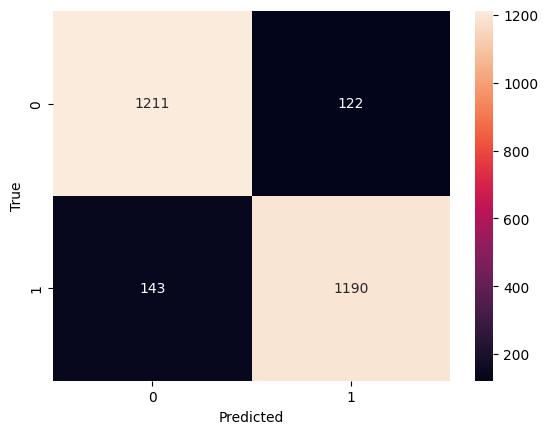

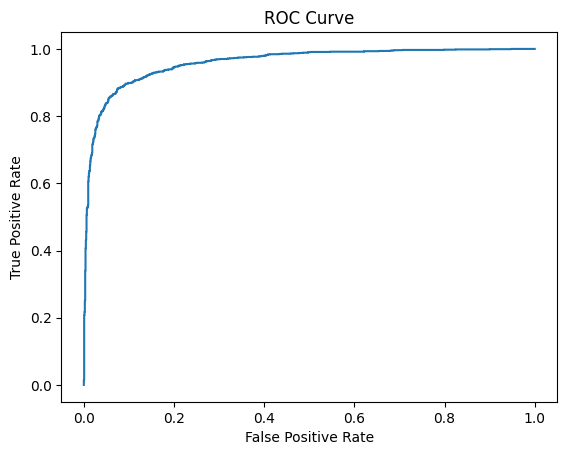

In [ ]:
# CountVectorizer ile Naive Bayes
# cross_val_score ile √ßapraz doƒürulama yapma
cv_scores = cross_val_score(naive_bayes_count, X_train, y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

# Test verisi √ºzerinde tahmin yapma ve sƒ±nƒ±flandƒ±rma raporu olu≈üturma
result = naive_bayes_count.predict(X_test)
cr = classification_report(y_test, result)
print(cr)

# Modelin tahminlerini alƒ±n
y_pred = naive_bayes_count.predict(X_test)
y_pred_proba = naive_bayes_count.predict_proba(X_test)

# Eƒüitim ve test doƒüruluklarƒ±nƒ± yazdƒ±rma
print('Train Accuracy : %.3f' % naive_bayes_count.score(X_train, y_train))
print('Test Accuracy : %.3f' % naive_bayes_count.score(X_test, y_test))

# Sensitivity ve Specificity hesaplama
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba[:, 1]))

# Precision, Recall ve F1 skorlarƒ±nƒ± hesaplama ve yazdƒ±rma
y_pred = naive_bayes_count.predict(X_test)
print("precision score:", precision_score(y_test, y_pred, average='macro'))
print(" recall score",recall_score(y_test, y_pred, average='macro'))
print(" f1 score",f1_score(y_test, y_pred, average='macro'))

# Hata matrisini √ßizme
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve √ßizimi
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TfidfVectorizer ile Naive Bayes modeli i√ßin bir Pipeline olu≈üturma
naive_bayes_tfidf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

# Naive Bayes modelini olu≈üturma ve eƒüitme
naive_bayes_tfidf.fit(X_train, y_train)




Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

CV average score: 0.89
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1333
           1       0.90      0.89      0.90      1333

    accuracy                           0.90      2666
   macro avg       0.90      0.90      0.90      2666
weighted avg       0.90      0.90      0.90      2666

Train Accuracy : 0.970
Test Accuracy : 0.898
Sensitivity: 0.8942235558889723
Specificity: 0.9009752438109527
ROC AUC Score: 0.9607910229620421
precision score: 0.897617525360084
recall score: 0.8975993998499625
f1 score: 0.8975982328464047


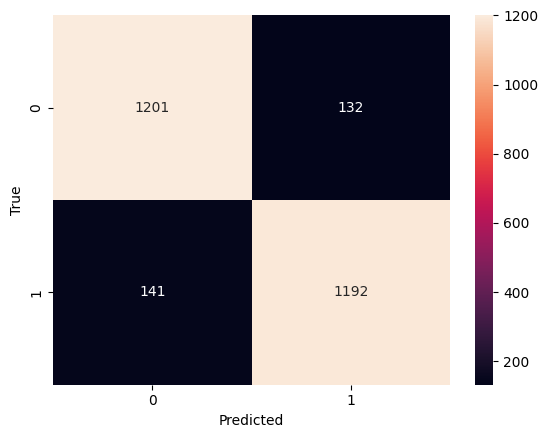

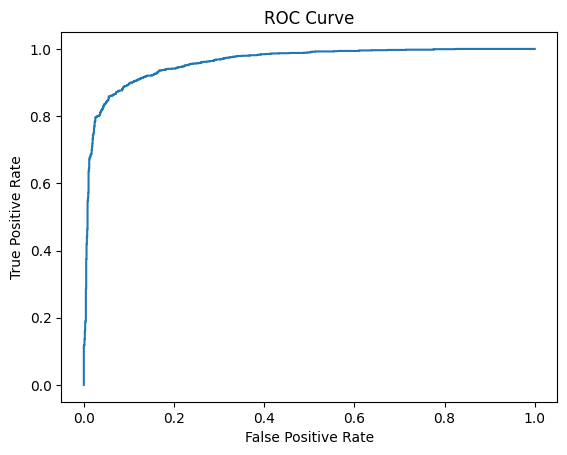

In [ ]:
# TfidfVectorizer ile Naive Bayes
# cross_val_score ile √ßapraz doƒürulama yapma
cv_scores = cross_val_score(naive_bayes_tfidf, X_train, y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

# Test verisi √ºzerinde tahmin yapma ve sƒ±nƒ±flandƒ±rma raporu olu≈üturma
result = naive_bayes_tfidf.predict(X_test)
cr = classification_report(y_test, result)
print(cr)

# Modelin tahminlerini alƒ±n
y_pred_proba = naive_bayes_tfidf.predict_proba(X_test)

# Eƒüitim ve test doƒüruluklarƒ±nƒ± yazdƒ±rma
print('Train Accuracy : %.3f' % naive_bayes_tfidf.score(X_train, y_train))
print('Test Accuracy : %.3f' % naive_bayes_tfidf.score(X_test, y_test))

# Sensitivity ve Specificity hesaplama
tn, fp, fn, tp = confusion_matrix(y_test, result).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba[:, 1]))

# Precision, Recall ve F1 skorlarƒ±nƒ± hesaplama ve yazdƒ±rma
print("precision score:", precision_score(y_test, result, average='macro'))
print("recall score:", recall_score(y_test, result, average='macro'))
print("f1 score:", f1_score(y_test, result, average='macro'))

# Hata matrisini √ßizme
sns.heatmap(confusion_matrix(y_test, result), annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve √ßizimi
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [ ]:

# TfidfVectorizer ile SVC modeli i√ßin bir Pipeline olu≈üturma
svm_tfidf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC(probability=True))])

# Modeli eƒüitme
svm_tfidf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SVC(probability=True))])

CV average score: 0.89
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1333
           1       0.91      0.89      0.90      1333

    accuracy                           0.90      2666
   macro avg       0.90      0.90      0.90      2666
weighted avg       0.90      0.90      0.90      2666

Train Accuracy : 0.995
Test Accuracy : 0.897
Sensitivity: 0.8859714928732183
Specificity: 0.9077269317329333
ROC AUC Score: 0.9552704192552265
precision score: 0.8970371296271272
recall score: 0.8968492123030758
f1 score: 0.8968370055644556


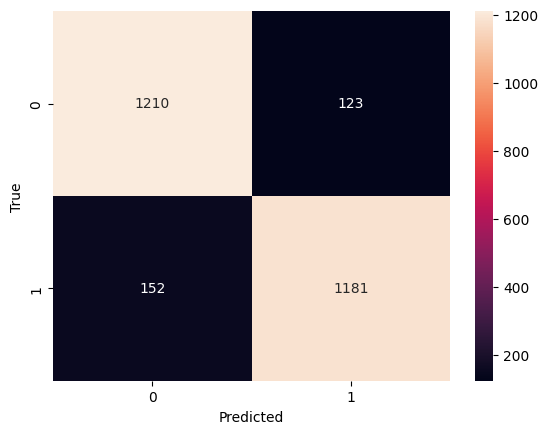

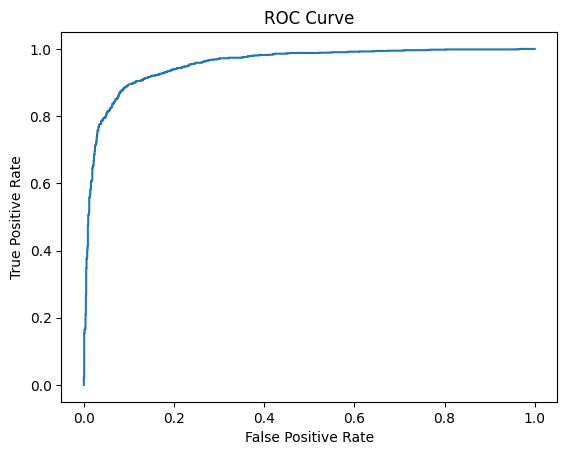

In [ ]:
# cross_val_score ile √ßapraz doƒürulama yapma
cv_scores = cross_val_score(svm_tfidf, X_train, y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

# Test verisi √ºzerinde tahmin yapma ve sƒ±nƒ±flandƒ±rma raporu olu≈üturma
result = svm_tfidf.predict(X_test)
cr = classification_report(y_test, result)
print(cr)

# Eƒüitim ve test doƒüruluklarƒ±nƒ± yazdƒ±rma
print('Train Accuracy : %.3f' % svm_tfidf.score(X_train, y_train))
print('Test Accuracy : %.3f' % svm_tfidf.score(X_test, y_test))

# Sensitivity ve Specificity hesaplama
tn, fp, fn, tp = confusion_matrix(y_test, result).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba[:, 1]))

# Precision, Recall ve F1 skorlarƒ±nƒ± hesaplama ve yazdƒ±rma
print("precision score:", precision_score(y_test, result, average='macro'))
print("recall score:", recall_score(y_test, result, average='macro'))
print("f1 score:", f1_score(y_test, result, average='macro'))

# Hata matrisini √ßizme
sns.heatmap(confusion_matrix(y_test, result), annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve √ßizimi
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
# CountVectorizer ile SVC
# CountVectorizer ile SVC modeli i√ßin bir Pipeline olu≈üturma
svm_countvec = Pipeline([('count_vect', CountVectorizer()), ('clf', SVC())])

# Modeli eƒüitme
svm_countvec.fit(X_train, y_train)

Pipeline(steps=[('count_vect', CountVectorizer()), ('clf', SVC())])

CV average score: 0.88
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1333
           1       0.89      0.86      0.88      1333

    accuracy                           0.88      2666
   macro avg       0.88      0.88      0.88      2666
weighted avg       0.88      0.88      0.88      2666

Train Accuracy : 0.978
Test Accuracy : 0.878
Sensitivity: 0.8642160540135033
Specificity: 0.8927231807951987
ROC AUC Score: 0.9552704192552265
precision score: 0.8787774332632101
recall score: 0.878469617404351
f1 score: 0.8784449217800113


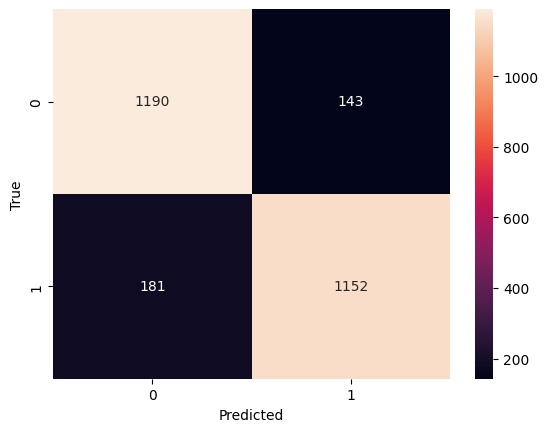

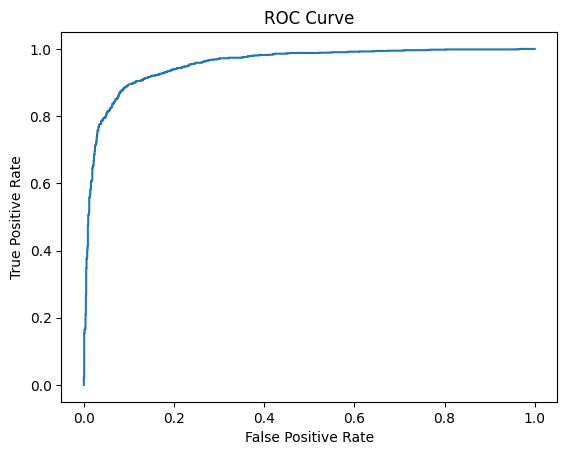

In [ ]:
#CountVectorizer ile SVC
# cross_val_score ile √ßapraz doƒürulama yapma
cv_scores = cross_val_score(svm_countvec, X_train, y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

# Test verisi √ºzerinde tahmin yapma ve sƒ±nƒ±flandƒ±rma raporu olu≈üturma
result = svm_countvec.predict(X_test)
cr = classification_report(y_test, result)
print(cr)

# Eƒüitim ve test doƒüruluklarƒ±nƒ± yazdƒ±rma
print('Train Accuracy : %.3f' % svm_countvec.score(X_train, y_train))
print('Test Accuracy : %.3f' % svm_countvec.score(X_test, y_test))

# Sensitivity ve Specificity hesaplama
tn, fp, fn, tp = confusion_matrix(y_test, result).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba[:, 1]))

# Precision, Recall ve F1 skorlarƒ±nƒ± hesaplama ve yazdƒ±rma
y_pred = svm_countvec.predict(X_test)
print("precision score:", precision_score(y_test, result, average='macro'))
print("recall score:", recall_score(y_test, result, average='macro'))
print("f1 score:", f1_score(y_test, result, average='macro'))

# Hata matrisini √ßizme
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve √ßizimi
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [ ]:
!pip install requests
!pip install html5lib
!pip install bs4

farkli bir film sitesinden yorumlari cekerek pozitivmi negativmi yuzde kac pozitiv negativ oldugunu modelimiz nasil tahmin etmis bunu gormek istiyoruz bunu icin web screping yapicam
web sitesinin urlsini kopyalayip yapisdiricam bununla istek atiyorum ve sayfanin aslina html kodunu cekmis oliyoruz bunun icinde Dƒ∞V "class":"card-body text-white olanlari cekiyorum

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv

URL = "https://www.hdfilmcehennemi.life/where-the-crawdads-sing-285/"
r = requests.get(URL)

soup = BeautifulSoup(r.content, 'html.parser')
#print(soup)
quotes=[]  # a list to store quotes

text=soup.find("div",{"class":"card-body text-white"})

text2=text.find_all("p",{"class":"text-justify comment-text text-break mb-2 text-white-50"})
#print(text2)

comment_list=[]
for i in text2:
  comment_list.append(i.text)
# text2_2=text.find_all("ul")
print(comment_list[0])

Kitabƒ±nƒ± bir ka√ß ay √∂nce okumu≈ütum. Kitabƒ±nƒ± o kadar √ßok beƒüenmi≈ütim ki hissettirdiƒüi duygu, o yalnƒ±zlƒ±k hissi i√ßime i≈ülemi≈üti. Filmini izlemeye ba≈üladƒ±ƒüƒ±mda her ≈üeyden √∂te aƒüzƒ±mƒ± a√ßƒ±k bƒ±rakƒ±p beni etkileyen; kitabƒ±nƒ± okurken kafamda canlandƒ±rdƒ±ƒüƒ±m her ≈üey filmdekilerle bire bir aynƒ±ydƒ± bu beni biraz duygulandƒ±rdƒ±. Film o kadar i√ßinize i≈üliyor ki √ºstelik kitabƒ±nƒ± okuyup izleyince duygulanmamak insanƒ±n elinde olmuyor.


In [ ]:
# Tahminlerin yapƒ±lmasƒ± ve olasƒ±lƒ±klarƒ±n hesaplanmasƒ±
positive_count = 0
negative_count = 0

for i in range(len(comment_list)):
    prediction = naive_bayes_count.predict([comment_list[i]])
    proportion = naive_bayes_count.predict_proba([comment_list[i]])

    if prediction[0] == 1:
        positive_count += 1
        print(comment_list[i], " is: ", proportion[0][1], " Positive")
    else:
        negative_count += 1
        print(comment_list[i], " is: ", proportion[0][0], " Negative")

# Toplam yorum sayƒ±sƒ±nƒ± yazdƒ±rma
total_comments = positive_count + negative_count
print("Toplam yorum sayƒ±sƒ±:", total_comments)
print("Pozitif yorum sayƒ±sƒ±:", positive_count)
print("Negatif yorum sayƒ±sƒ±:", negative_count)

Kitabƒ±nƒ± bir ka√ß ay √∂nce okumu≈ütum. Kitabƒ±nƒ± o kadar √ßok beƒüenmi≈ütim ki hissettirdiƒüi duygu, o yalnƒ±zlƒ±k hissi i√ßime i≈ülemi≈üti. Filmini izlemeye ba≈üladƒ±ƒüƒ±mda her ≈üeyden √∂te aƒüzƒ±mƒ± a√ßƒ±k bƒ±rakƒ±p beni etkileyen; kitabƒ±nƒ± okurken kafamda canlandƒ±rdƒ±ƒüƒ±m her ≈üey filmdekilerle bire bir aynƒ±ydƒ± bu beni biraz duygulandƒ±rdƒ±. Film o kadar i√ßinize i≈üliyor ki √ºstelik kitabƒ±nƒ± okuyup izleyince duygulanmamak insanƒ±n elinde olmuyor.  is:  0.9503899841479404  Negative
yoruma gerek yok..10/10  is:  0.6802184068519266  Positive
Yorumlara ≈ü√∂yle bir baktƒ±m da film bittikten sonra ; herkeste farklƒ± bir tat bƒ±rakmƒ±≈ü. Ben √ßok beƒüendim filmi ,aktƒ± gitti izlerken hi√ß sƒ±kƒ±lmadƒ±m. Eski zamanlarƒ± hatƒ±rlattƒ± bana ,doƒüallƒ±ƒüƒ± ,masumiyeti ,iyi niyeti . Duygusal bir filmdi bana g√∂re .Sƒ±kƒ±cƒ± deƒüildi, √∂yle aksiyon, ters k√∂≈üe falan yok  ama izlettiriyor kendini, b√∂yle kendi halinde ,naif bir flmdi.  is:  0.9457561030735913  Positive
5/10 izlerken 

In [ ]:
# Tahminlerin yapƒ±lmasƒ± ve olasƒ±lƒ±klarƒ±n hesaplanmasƒ±
positive_count = 0
negative_count = 0

for i in range(len(comment_list)):
    prediction = naive_bayes_tfidf.predict([comment_list[i]])

    if prediction[0] == 1:
        positive_count += 1
    else:
        negative_count += 1

# Toplam yorum sayƒ±sƒ±nƒ±, pozitif ve negatif yorum sayƒ±larƒ±nƒ± yazdƒ±rma
total_comments = positive_count + negative_count
print("Toplam yorum sayƒ±sƒ±:", total_comments)
print("Pozitif yorum sayƒ±sƒ±:", positive_count)
print("Negatif yorum sayƒ±sƒ±:", negative_count)


Toplam yorum sayƒ±sƒ±: 31
Pozitif yorum sayƒ±sƒ±: 24
Negatif yorum sayƒ±sƒ±: 7


In [ ]:
# Tahminlerin yapƒ±lmasƒ± ve olasƒ±lƒ±klarƒ±n hesaplanmasƒ±
positive_count = 0
negative_count = 0

for i in range(len(comment_list)):
    prediction = svm_tfidf.predict([comment_list[i]])

    if prediction[0] == 1:
        positive_count += 1
    else:
        negative_count += 1

# Toplam yorum sayƒ±sƒ±nƒ±, pozitif ve negatif yorum sayƒ±larƒ±nƒ± yazdƒ±rma
total_comments = positive_count + negative_count
print("Toplam yorum sayƒ±sƒ±:", total_comments)
print("Pozitif yorum sayƒ±sƒ±:", positive_count)
print("Negatif yorum sayƒ±sƒ±:", negative_count)


Toplam yorum sayƒ±sƒ±: 31
Pozitif yorum sayƒ±sƒ±: 22
Negatif yorum sayƒ±sƒ±: 9


In [ ]:
# Tahminlerin yapƒ±lmasƒ± ve olasƒ±lƒ±klarƒ±n hesaplanmasƒ±
positive_count = 0
negative_count = 0

for i in range(len(comment_list)):
    prediction = svm_countvec.predict([comment_list[i]])

    if prediction[0] == 1:
        positive_count += 1
    else:
        negative_count += 1

# Toplam yorum sayƒ±sƒ±nƒ±, pozitif ve negatif yorum sayƒ±larƒ±nƒ± yazdƒ±rma
total_comments = positive_count + negative_count
print("Toplam yorum sayƒ±sƒ±:", total_comments)
print("Pozitif yorum sayƒ±sƒ±:", positive_count)
print("Negatif yorum sayƒ±sƒ±:", negative_count)

Toplam yorum sayƒ±sƒ±: 31
Pozitif yorum sayƒ±sƒ±: 17
Negatif yorum sayƒ±sƒ±: 14
